In [8]:
#!/usr/bin/Rscript

if (!require("pacman")) install.packages("pacman")
pacman::p_load(ggplot2, sqldf, tidyr, stringr, dplyr, doBy, plyr)
RESEARCH_HOME = Sys.getenv(c("RESEARCH_HOME"))
PATH = "Scripts/Python/data/"
SAVE_PDF = F
W = 6
H = 6
muDefault      = 4
deltaDefault   = 5
epsilonDefault = 30

data = read.csv(paste0(RESEARCH_HOME, PATH, 'methods_nohup.csv'), header = F, sep = ";")


In [9]:
head(data)
nrow(data)

V1,V2,V3,V4,V5,V6
1,MergeLast,60,4,5,654.964
2,MergeLast,70,4,5,686.385
3,MergeLast,80,4,5,677.862
4,MergeLast,90,4,5,798.868
0,MergeLast,100,4,5,927.875
5,MergeLast,60,4,5,631.360


[1] 14

In [10]:
names(data) = c("runID", "Method", "Epsilon", "Mu", "Delta", "Time")
data$Epsilon = as.numeric(as.character(data$Epsilon))
data$Mu      = as.numeric(as.character(data$Mu))
data$Delta   = as.numeric(as.character(data$Delta))
data$Time    = as.numeric(as.character(data$Time))

df = summaryBy(data=data, Time ~ Epsilon + Mu + Delta + Method, FUN = function(x){ c(m=mean(x)) })
df

Epsilon,Mu,Delta,Method,Time.m
60,4,5,BFE,96.5500
60,4,5,MergeLast,643.1620
70,4,5,BFE,160.2100
70,4,5,MergeLast,688.0975
80,4,5,BFE,274.7400
80,4,5,MergeLast,674.3105
90,4,5,BFE,531.3500
90,4,5,MergeLast,794.0160
100,4,5,BFE,1092.4700
100,4,5,MergeLast,927.8750


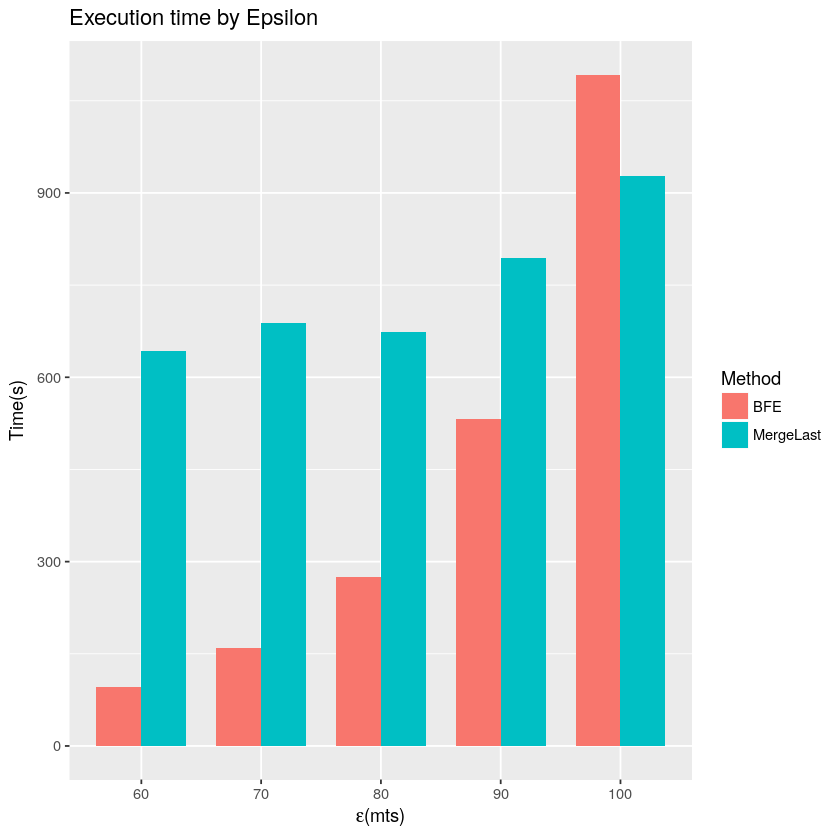

In [11]:
title = "Execution time by Epsilon"
g = ggplot(data=df, aes(x=factor(Epsilon), y=Time.m, fill=Method)) +
  geom_bar(stat="identity", position=position_dodge(width = 0.75),width = 0.75) +
  labs(title=title, y="Time(s)", x=expression(paste(epsilon,"(mts)"))) 
plot(g)
